In [146]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras import Model

### Types

In [67]:
tf.constant([3, 4, 22], dtype=tf.uint32)

<tf.Tensor: shape=(3,), dtype=uint32, numpy=array([ 3,  4, 22], dtype=uint32)>

In [63]:
tf.constant([2, 5, -4], dtype=tf.float32)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 2.,  5., -4.], dtype=float32)>

In [65]:
tf.constant(['2', 'hello'], dtype=tf.string)

<tf.Tensor: shape=(2,), dtype=string, numpy=array([b'2', b'hello'], dtype=object)>

### Tensors

In [26]:
#vactor tensor
tf.constant([3, 4, 50, 2, -2, 1.9])

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([ 3. ,  4. , 50. ,  2. , -2. ,  1.9], dtype=float32)>

In [61]:
#variable tensor
a = tf.Variable([[2, 3, 4], [-3, 1, 5]])

### Activation Functions

In [9]:
tf.nn.relu(np.array([[-1, 4, 6, -33], [4, -2, 3, -5]]))

<tf.Tensor: shape=(2, 4), dtype=int32, numpy=
array([[0, 4, 6, 0],
       [4, 0, 3, 0]])>

In [69]:
tf.nn.sigmoid(tf.constant([3, 4, 56], dtype=tf.float32))

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([0.95257413, 0.98201376, 1.        ], dtype=float32)>

### Layers

##### Dense

In [109]:
#build dense layer
dense_layer = tf.keras.layers.Dense(23, activation=tf.nn.relu)

In [110]:
dense_layer(tf.constant([[2, 3, 2]], dtype=tf.float32))

<tf.Tensor: shape=(1, 23), dtype=float32, numpy=
array([[0.        , 1.2904663 , 0.58032227, 0.        , 2.0083008 ,
        0.        , 1.4127808 , 0.32843018, 0.        , 2.1274414 ,
        0.5821533 , 0.44462585, 0.9621582 , 0.        , 0.        ,
        0.5593262 , 0.3932495 , 1.4438477 , 0.        , 0.37670898,
        0.        , 0.5061035 , 0.        ]], dtype=float32)>

In [111]:
dense_layer.get_weights()

[array([[ 0.23017752,  0.46914977,  0.02672285, -0.2701758 ,  0.2403521 ,
         -0.13585442, -0.06123725,  0.18940264, -0.06357178,  0.12684321,
          0.18375081,  0.01035684,  0.27927017, -0.04624197, -0.38204175,
          0.23613548, -0.23340653,  0.15298653, -0.11287564, -0.08092049,
         -0.44740573,  0.41702652,  0.1955297 ],
        [-0.47009522, -0.03142819,  0.01083317,  0.35053992,  0.37583846,
          0.01191917,  0.24304366, -0.09806314, -0.00613528,  0.4688095 ,
         -0.11264703,  0.12720102,  0.30588192, -0.02014583, -0.15655756,
          0.30006766,  0.03716928,  0.19989038,  0.16618711, -0.08545712,
          0.14431107, -0.12190333, -0.412731  ],
        [ 0.10399103,  0.22317266,  0.24717802, -0.33941686,  0.20023042,
         -0.11549842,  0.40299708,  0.12186837, -0.0412235 ,  0.23379916,
          0.2764851 ,  0.02116805, -0.2570638 , -0.33505738,  0.02554387,
         -0.40649262,  0.3743376 ,  0.269076  , -0.16796193,  0.39749336,
         -0.31

##### Conv2D

In [211]:
img = cv2.imread('images/cat.jpg')
img = np.expand_dims(img, axis=0)
img = img.astype(np.float32)
img.shape

(1, 185, 273, 3)

In [212]:
layer_conv = tf.keras.layers.Conv2D(16, (5, 5), activation=tf.nn.relu)

In [213]:
layer2Img = layer_conv(img)
layer2Img.shape

TensorShape([1, 181, 269, 16])

In [214]:
layer_conv.get_weights()[0].shape

(5, 5, 3, 16)

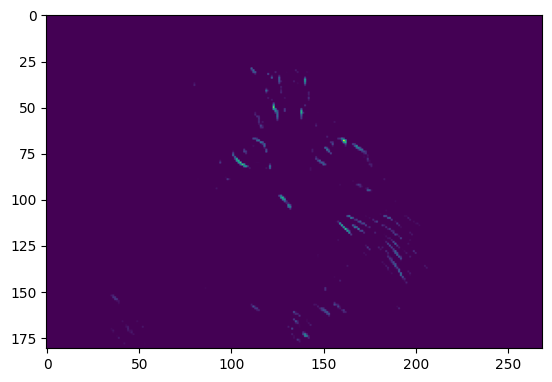

In [221]:
plt.imshow(layer2Img[0, :, :, 8])

##### Flatten

In [177]:
tensor = tf.constant([[1, 2, 3], [4, 5, 6], [33, 33, 22]])

# Create a Flatten layer
flatten_layer = tf.keras.layers.Flatten()

# Flatten the tensor using the Flatten layer
flattened_tensor = flatten_layer(tensor)

In [178]:
flattened_tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [33, 33, 22]])>

##### MaxPooling2D

In [254]:
img = cv2.imread('images/cat.jpg')
img = np.expand_dims(img, axis=0)

In [255]:
img = img.astype(np.float32)
img.shape

(1, 185, 273, 3)

In [257]:
layer2Img = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(img)
layer2Img.shape

TensorShape([1, 92, 136, 3])

In [258]:
layer2Img[0].shape

TensorShape([92, 136, 3])

In [263]:
output = tf.cast(layer2Img[0], tf.int32) 

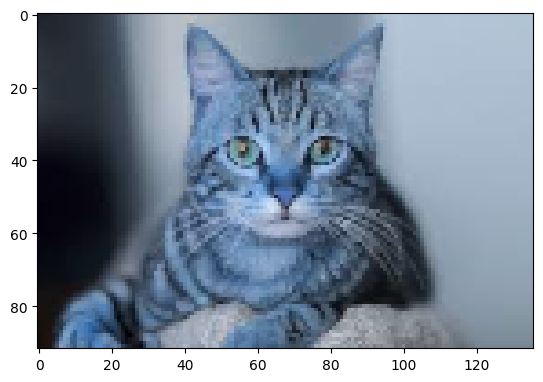

In [264]:
plt.imshow(output)

##### GlobalAveragePooling2D

In [265]:
img.shape

(1, 185, 273, 3)

In [266]:
avg = tf.keras.layers.GlobalAveragePooling2D()

In [267]:
avg(img)

<tf.Tensor: shape=(1, 3), dtype=float32, numpy=array([[ 99.6635 , 116.13235, 135.05504]], dtype=float32)>

##### Dropout

In [360]:
layer = tf.keras.layers.Dropout(0.3)

In [361]:
input_data = tf.constant([[23, 54, 6, 34, 5], [23, 43, 54, 32, 3]], dtype=tf.float32)

In [377]:
output = layer(input_data, training=True)
output

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[32.857143 , 77.14286  ,  8.571428 , 48.57143  ,  7.1428576],
       [ 0.       ,  0.       , 77.14286  ,  0.       ,  4.285714 ]],
      dtype=float32)>

### change shape and type

In [378]:
tensor

<tf.Tensor: shape=(3, 3), dtype=int32, numpy=
array([[ 1,  2,  3],
       [ 4,  5,  6],
       [33, 33, 22]])>

In [383]:
tensor.shape

TensorShape([3, 3])

In [387]:
tensor = tensor[:, :, tf.newaxis]
tensor.shape

TensorShape([3, 3, 1])

In [389]:
tensor = tf.reshape(tensor, shape=(3, 1, 3))
tensor.shape

TensorShape([3, 1, 3])

In [386]:
tf.cast(tensor, tf.float32)

<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [33., 33., 22.]], dtype=float32)>

### Call model instance

In [479]:
model = tf.keras.models.Sequential()
model.add(Dense(16, activation='relu', input_shape=(10,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [493]:
model.compile(optimizer = 'adam')

In [475]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 16)                176       
                                                                 
 dense_30 (Dense)            (None, 1)                 17        
                                                                 
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


In [478]:
model(tf.random.normal(shape=(1, 10)))

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.5205299]], dtype=float32)>

### Convert to numpy array

In [496]:
tensor.numpy()

array([[[ 1,  2,  3]],

       [[ 4,  5,  6]],

       [[33, 33, 22]]])

### Math operations

In [502]:
tf.math.add([2, 3], [2, 3])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 6])>

In [498]:
tf.math.square([2, 3])

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([4, 9])>

In [504]:
tf.math.reduce_sum([2, 3, 4])

<tf.Tensor: shape=(), dtype=int32, numpy=9>

In [512]:
tf.math.multiply([[2, 3], [1, 3]], [[4, 2], [4, 5]])

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 8,  6],
       [ 4, 15]])>

### GPU acceleration

In [526]:
x = tf.random.uniform([10000, 10000])
y = tf.random.uniform([10000, 10000])

In [527]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [528]:
x.device

'/job:localhost/replica:0/task:0/device:GPU:0'

In [529]:
y.device

'/job:localhost/replica:0/task:0/device:GPU:0'

In [533]:
#watch the performance
for i in range(5000):
    result = tf.math.multiply(x, y)
    
result.shape

TensorShape([10000, 10000])

In [539]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(1000):
    tf.linalg.matmul(x, x)

  result = time.time()-start

  print("10 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.list_physical_devices("GPU"):
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

On CPU:
10 loops: 3840.86ms
On GPU:
10 loops: 60.18ms


### tf.data

### model subclassing API

In [435]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super().__init__()
        self.act = tf.nn.relu
        
    def call(self, x):
        output = tf.keras.layers.Dense(16)(x)
        return output

In [436]:
model = MyModel()

In [437]:
model.call(tf.constant([[2]], dtype=tf.float32))

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[ 1.1757812 ,  0.7285156 , -0.90185547, -0.07409668, -0.3930664 ,
        -0.9526367 , -1.0126953 , -0.5444336 ,  0.1907959 ,  0.12261963,
         0.64160156, -0.49804688, -1.0361328 , -1.1220703 ,  0.98291016,
        -0.07989502]], dtype=float32)>

In [438]:
model.act

<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>